# Unsupervised analysis of days of week

Treating daily crossings of Seatle's fremont bridge as features to learn about the relationship between days.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from jupyterworkflow.data import get_fremont_data

## Load data

In [2]:
data = get_fremont_data()

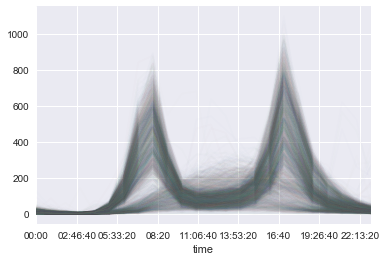

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## Principal component analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2585, 24)

In [5]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2585, 2)

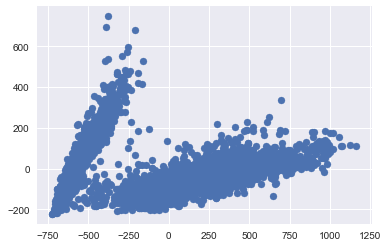

In [6]:
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsupervised clustering

In [7]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

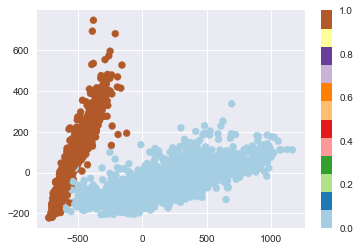

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='Paired');
plt.colorbar()

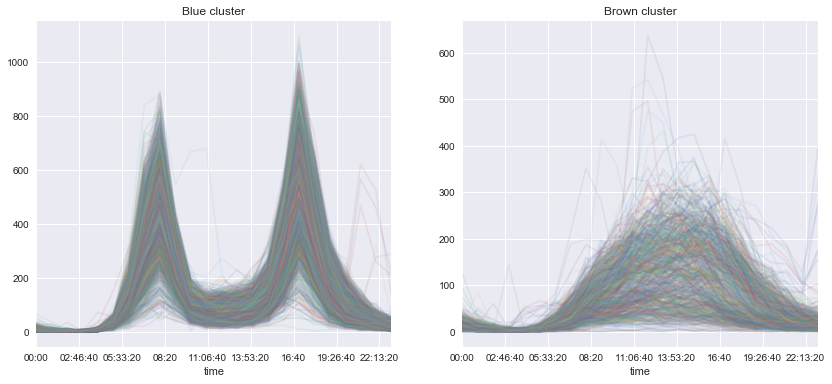

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Blue cluster')
ax[1].set_title('Brown cluster');

## Comparing with day of week

In [10]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

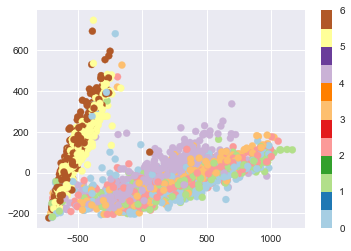

In [11]:
plt.scatter(X2[:, 0], X2[:, 1], c=day_of_week, cmap='Paired')
plt.colorbar();

## Analysing outliers

The following are weekdays with a holiday-like pattern. 

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (day_of_week < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2019-10-18', '2019-10-21', '2019-10-22', '2019-10-23',
               '2019-10-24', '2019-10-25', '2019-10-28', '2019-10-29',
               '2019-10-30', '2019-10-31'],
              dtype='datetime64[ns]', length=1781, freq=None)

What's up with 2 Feb 2006? [Snow storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)